In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp


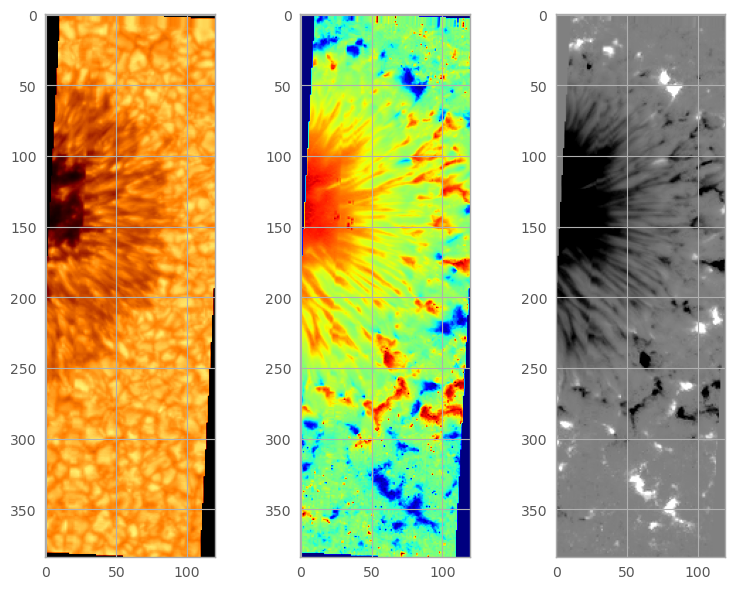

In [3]:
dc_rot = ndimage.rotate(data_conti, -3, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -3, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -3, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,32], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,32], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,32], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

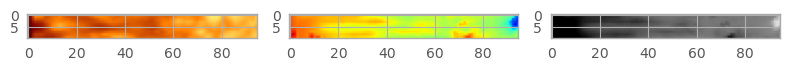

In [4]:
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[135:145,25:,32], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[135:145,25:,32], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[135:145,25:,32], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

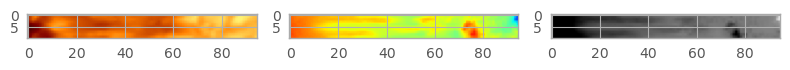

In [5]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[135:145,25:,33], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[135:145,25:,33], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[135:145,25:,33], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

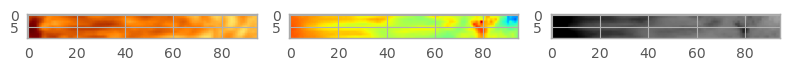

In [6]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[135:145,25:,34], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[135:145,25:,34], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[135:145,25:,34], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

#45 or 50 it is over.

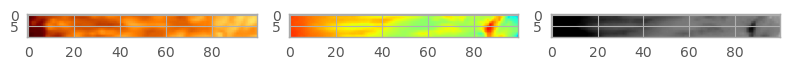

In [7]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[135:145,20:,35], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[135:145,20:,35], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[135:145,20:,35], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

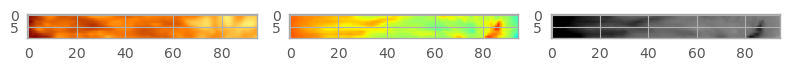

In [8]:
#DONT USE THIS IS BAD

fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[135:145,25:,36], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[135:145,25:,36], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[135:145,25:,36], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

In [59]:
#continuum intensity
dc_rot[135:145,25:,34][5][0:70]

array([ 6595.77831477,  6646.22244215,  6617.40508596,  7122.95948661,
        8859.34819849, 10987.16480369, 12262.68089702, 12449.90234671,
       12132.22470824, 11591.57617107, 11339.69470399, 11485.88919929,
       11631.01675456, 11517.93547332, 11218.76090418, 10931.04376273,
       10690.78008593, 10403.43087211, 10168.95698438,  9990.30457433,
        9856.28418607,  9738.87177572,  9677.75382979,  9660.50329466,
        9739.74225542,  9747.93368571,  9434.50887919,  9145.59443764,
        9066.32427544,  9056.91701484,  9148.07196365,  9217.97051838,
        9344.10898459,  9458.08119344,  9680.25481011,  9929.67749735,
       10028.87860208, 10100.77810721, 10217.88684774, 10367.21195608,
       10705.87472917, 10975.4752196 , 11132.18410802, 11254.86642399,
       11298.75989701, 11263.77388505, 11232.95364702, 11183.91155483,
       11077.3148027 , 11082.96714957, 11027.67697924, 10884.84431884,
       10821.88641984, 10652.87809085, 10585.85782601, 10744.84432623,
      

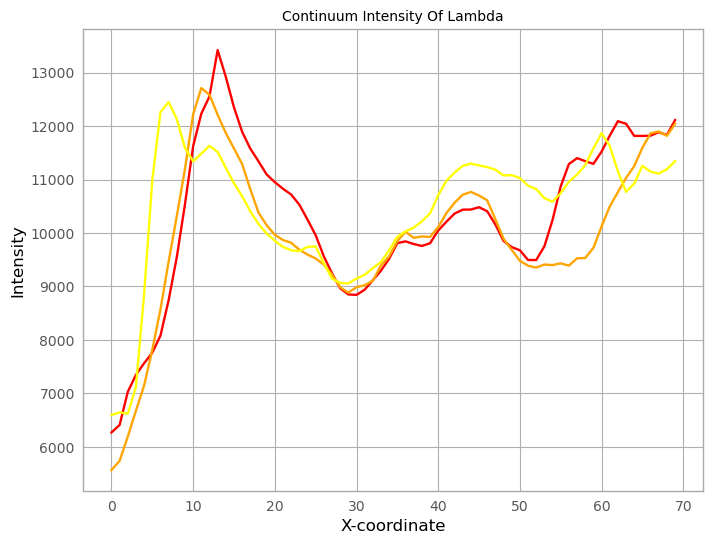

In [60]:
#vertical index [5] #so far only done for 32, 33, 34
dc_y0 = np.array([ 6268.62222015,  6408.86064416,  7027.84558387,  7346.63408905,
        7564.05794042,  7760.55362098,  8080.0974461 ,  8743.97065447,
        9548.10342578, 10536.75432656, 11624.32119954, 12231.00622811,
       12555.45030029, 13421.41246306, 12921.37784916, 12350.82943323,
       11893.27806902, 11577.58464104, 11341.53357195, 11095.36977966,
       10951.40873622, 10827.93860675, 10720.09578411, 10530.35234783,
       10251.6661916 ,  9958.51349448,  9564.15449379,  9246.61455071,
        8966.28409087,  8850.86750234,  8842.20828807,  8938.97097791,
        9117.79791476,  9297.40274752,  9520.27624729,  9811.64572799,
        9843.3104314 ,  9794.44178494,  9758.09670847,  9808.05544058,
       10045.69600533, 10210.68828576, 10362.02891466, 10437.20726013,
       10439.1220871 , 10482.73751213, 10407.11018265, 10159.93354992,
        9852.76813123,  9736.39015578,  9677.26637688,  9496.22133462,
        9493.66950872,  9751.61942534, 10244.04730544, 10872.6124578 ,
       11289.62109708, 11400.55259613, 11344.11655005, 11293.46216337,
       11521.65576281, 11820.92728257, 12091.88586398, 12043.35430534,
       11816.6339849 , 11816.00100893, 11820.74313854, 11886.1258714 ,
       11832.63239055, 12112.62879038])
dc_x0 = range(0,70)

#vertical index [5]
dc_y1 = np.array([ 5564.61154439,  5737.06946679,  6190.91915265,  6676.55936347,
        7147.57094311,  7815.32355481,  8568.94917158,  9464.64634642,
       10316.13791788, 11196.89239563, 12219.75361912, 12711.32149857,
       12586.63317395, 12211.90335907, 11870.42279   , 11582.60268484,
       11289.85806706, 10818.05837327, 10381.35155217, 10145.27492542,
        9966.57118574,  9868.72602491,  9817.7803641 ,  9689.347779  ,
        9596.20160063,  9524.29342936,  9409.64886138,  9223.60489548,
        8984.94834231,  8884.22922496,  8985.99105836,  9023.07676919,
        9107.50987841,  9394.10509015,  9564.77548911,  9849.04921594,
       10024.91682376,  9909.13930165,  9936.54775418,  9925.93886643,
       10109.64404197, 10370.54415606, 10566.16847369, 10715.48092241,
       10767.60507897, 10701.67409043, 10610.6370755 , 10256.91574377,
        9891.21224852,  9686.62380962,  9479.79701667,  9387.9677029 ,
        9353.3104463 ,  9410.68228309,  9400.00530584,  9433.40086609,
        9389.82809571,  9526.52932924,  9531.81120056,  9721.99027835,
       10121.00906922, 10495.18721217, 10766.42053471, 11029.52318444,
       11253.03294144, 11594.7351575 , 11864.96598934, 11899.97582279,
       11818.382895  , 12043.65343571])
dc_x1 = range(0,70)

#vertical index [5]
dc_y2 = np.array([ 6595.77831477,  6646.22244215,  6617.40508596,  7122.95948661,
        8859.34819849, 10987.16480369, 12262.68089702, 12449.90234671,
       12132.22470824, 11591.57617107, 11339.69470399, 11485.88919929,
       11631.01675456, 11517.93547332, 11218.76090418, 10931.04376273,
       10690.78008593, 10403.43087211, 10168.95698438,  9990.30457433,
        9856.28418607,  9738.87177572,  9677.75382979,  9660.50329466,
        9739.74225542,  9747.93368571,  9434.50887919,  9145.59443764,
        9066.32427544,  9056.91701484,  9148.07196365,  9217.97051838,
        9344.10898459,  9458.08119344,  9680.25481011,  9929.67749735,
       10028.87860208, 10100.77810721, 10217.88684774, 10367.21195608,
       10705.87472917, 10975.4752196 , 11132.18410802, 11254.86642399,
       11298.75989701, 11263.77388505, 11232.95364702, 11183.91155483,
       11077.3148027 , 11082.96714957, 11027.67697924, 10884.84431884,
       10821.88641984, 10652.87809085, 10585.85782601, 10744.84432623,
       10959.81565636, 11092.47643652, 11270.9435963 , 11580.6104946 ,
       11867.07754571, 11629.53975318, 11152.42751168, 10769.06825458,
       10925.2148763 , 11258.31890332, 11145.48906878, 11112.05000811,
       11192.96479988, 11342.57844965])
dc_x2 = range(0,70)

#vertical index [5]
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Continuum Intensity Of Lambda")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()

In [ ]:
#you can calculate speed! looking at the head.

In [18]:
##magnetic inclinaton
mi_rot[135:145,20:,35][6][5:60]

array([147.55051561, 145.1952494 , 143.48728805, 141.22713773,
       139.8172548 , 137.7804854 , 135.98023089, 133.38899971,
       131.1577068 , 129.97945432, 128.06446209, 125.46935219,
       123.94609047, 122.29163761, 121.27579364, 120.09761639,
       119.35221933, 118.59829702, 116.91154549, 115.87144525,
       115.38407483, 115.32626953, 114.65330716, 114.99517061,
       116.6545675 , 116.96581087, 117.05928021, 118.55319337,
       119.65831958, 119.81000013, 119.23038179, 119.73783677,
       118.48520861, 117.51888003, 117.98844812, 118.52816247,
       116.23692922, 113.35169248, 110.77794504, 108.12457003,
       105.932118  , 104.26019974, 102.71147217, 100.64162199,
       100.48645614,  99.29271834,  98.35523187,  97.03531314,
        95.87032345,  96.03904832,  95.86278959,  95.27581291,
        94.52293977,  95.06540965,  95.26226834])

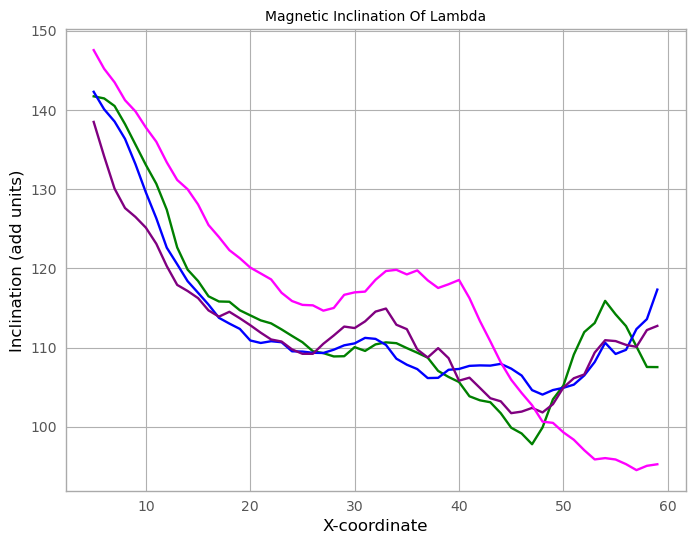

In [37]:
#vertical index [5]
mi_y0 = np.array([141.71379292, 141.45238989, 140.4960586 , 138.21045834,
       135.6302792 , 133.05047135, 130.66955271, 127.40387949,
       122.63548576, 119.83397696, 118.39690071, 116.46900448,
       115.81432616, 115.77927604, 114.70280829, 114.06283074,
       113.42847712, 113.04955656, 112.28692928, 111.46583531,
       110.6696057 , 109.53469417, 109.29539324, 108.87431419,
       108.90308017, 110.04985606, 109.57112874, 110.39511615,
       110.65243641, 110.54804429, 109.92798301, 109.34509384,
       108.72227563, 107.04753188, 106.28367309, 105.64454907,
       103.84462738, 103.33839274, 103.09066212, 101.70645913,
        99.87374948,  99.14672738,  97.79164698,  99.90515038,
       103.4617913 , 105.19670354, 109.10787224, 111.94912719,
       113.09552493, 115.89004496, 114.18978185, 112.70411379,
       110.12385852, 107.5428835 , 107.52875911])
mi_x0 = range(5,60)

#vertical index [5]
mi_y1 = np.array([142.28675626, 140.08037685, 138.53867544, 136.34679173,
       133.15121981, 129.58008528, 126.31628448, 122.60718301,
       120.51363199, 118.37427708, 116.90836535, 115.42011551,
       113.75059591, 113.02370198, 112.35074893, 110.89112154,
       110.57493701, 110.79688605, 110.66765256, 109.52245143,
       109.48901444, 109.33206429, 109.31226237, 109.72524296,
       110.27861179, 110.522494  , 111.21744455, 111.09215024,
       110.33213068, 108.59036376, 107.83013448, 107.27754822,
       106.1445575 , 106.17329232, 107.19030577, 107.29341615,
       107.68444099, 107.74336443, 107.71508547, 107.93932464,
       107.3355217 , 106.46585783, 104.62072637, 104.05649576,
       104.6320024 , 104.91427332, 105.31294359, 106.47447617,
       108.17086669, 110.60457904, 109.18763287, 109.70699815,
       112.33056022, 113.58642914, 117.31524053])
mi_x1 = range(5,60)

#vertical index [5]
mi_y2 = np.array([138.4837608 , 134.14617801, 130.06088729, 127.60832846,
       126.48795941, 125.12993254, 123.09632243, 120.28121086,
       117.90554843, 117.13618183, 116.23728964, 114.68880663,
       113.89631295, 114.51336581, 113.69420352, 112.81746787,
       111.87485648, 111.01522624, 110.7558103 , 109.76313043,
       109.20665737, 109.20469549, 110.47210709, 111.52028532,
       112.64721677, 112.45819968, 113.29998991, 114.53433033,
       114.92084101, 112.876687  , 112.32023879, 109.76011374,
       108.74390397, 109.9229739 , 108.65719866, 105.81272385,
       106.19252563, 104.9038691 , 103.59950409, 103.20624372,
       101.71437027, 101.90831705, 102.37458681, 101.80535834,
       102.84700724, 104.94551927, 106.12247284, 106.5988951 ,
       109.36373691, 110.92303616, 110.81415221, 110.33562803,
       110.08545878, 112.20466424, 112.73159571])
mi_x2 = range(5,60)

#vertical index [6]
mi_y3 = np.array([147.55051561, 145.1952494 , 143.48728805, 141.22713773,
       139.8172548 , 137.7804854 , 135.98023089, 133.38899971,
       131.1577068 , 129.97945432, 128.06446209, 125.46935219,
       123.94609047, 122.29163761, 121.27579364, 120.09761639,
       119.35221933, 118.59829702, 116.91154549, 115.87144525,
       115.38407483, 115.32626953, 114.65330716, 114.99517061,
       116.6545675 , 116.96581087, 117.05928021, 118.55319337,
       119.65831958, 119.81000013, 119.23038179, 119.73783677,
       118.48520861, 117.51888003, 117.98844812, 118.52816247,
       116.23692922, 113.35169248, 110.77794504, 108.12457003,
       105.932118  , 104.26019974, 102.71147217, 100.64162199,
       100.48645614,  99.29271834,  98.35523187,  97.03531314,
        95.87032345,  96.03904832,  95.86278959,  95.27581291,
        94.52293977,  95.06540965,  95.26226834])
mi_x3 = range(5,60)


#vertical index [5]
#mi_y4 = np.array([140.62183442, 139.61014214, 137.10070654, 135.67365209,
       #132.45387338, 130.24785613, 128.50767331, 124.58304672,
       #122.87583027, 120.32933293, 119.60746017, 116.94817956,
       #116.10411106, 116.24314372, 115.38766263, 113.68993811,
       #111.78036933, 110.57578523, 109.92169189, 108.2157239 ,
       #107.29571244, 106.81067067, 106.40037071, 105.94083179,
       #105.58705679, 104.73749527, 103.96789466, 104.87556128,
       #103.89218904, 103.56279904, 103.20944908, 104.41545473,
       #104.0151235 , 103.36321497, 104.503082  , 106.24490072,
       #107.63077055, 107.52616754, 109.2388823 , 110.1833847 ,
       #109.42983237, 108.97598581, 106.92072345, 105.40126365,
       #103.84046715, 100.99604612, 100.67993128,  99.39876308,
        #98.71294249,  97.24596031,  96.7640002 ,  98.23878209,
        #98.52435697,  99.80040208,  98.84228155])
#mi_x4 = range(20,75)

plt.title("Magnetic Inclination Of Lambda")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
plt.plot(mi_x3,mi_y3, color="magenta")
#plt.plot(mi_x4,mi_y4, color="cyan")

In [29]:
#Bz plots
bz_rot[135:145,25:,34][4][10:65]

array([-996.6400586 , -889.38078046, -767.73308827, -688.37966125,
       -624.00441932, -581.98910075, -561.71385539, -559.32424305,
       -516.90592567, -484.4228542 , -456.54269526, -459.4211635 ,
       -463.88249616, -443.6381277 , -401.36450463, -399.89789036,
       -400.46239966, -396.77851835, -378.52370118, -361.47155334,
       -343.95125775, -353.49866938, -372.35925949, -392.99683893,
       -442.04809711, -427.98707509, -455.60852586, -458.06904139,
       -448.25081786, -422.78815004, -397.05227127, -360.8674661 ,
       -329.74852265, -268.11326695, -243.22555371, -207.31321245,
       -177.9937837 , -145.37711044, -139.91344974, -148.18787975,
       -147.91405718, -141.43471816, -127.41622324, -149.71822119,
       -141.06947364, -139.94555478, -107.5546356 ,  -81.16839312,
        -89.34366359, -104.53214901, -119.06086043,  -58.24788819,
       -134.43230075, -282.54085789, -338.25267845])

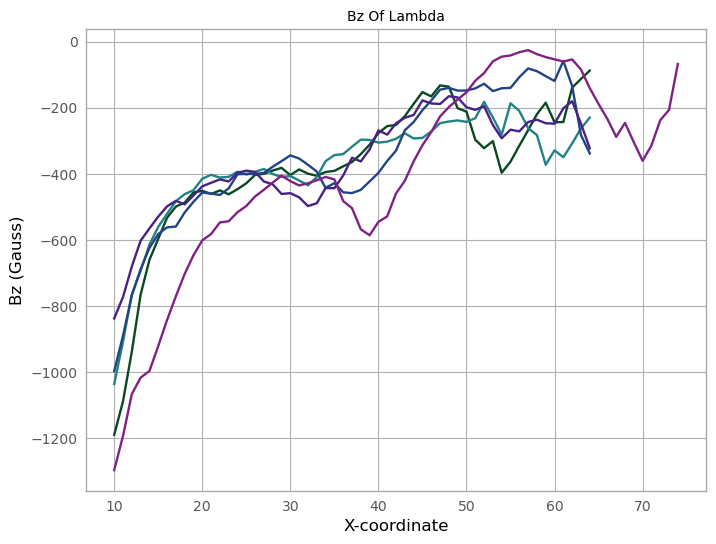

In [36]:
#vertical index [5]
bz_y0 = np.array([-1189.07578843, -1087.72282618,  -937.62789374,  -765.05888295,
        -660.10496705,  -596.33895696,  -532.72496845,  -498.98240903,
        -486.9549051 ,  -456.1393681 ,  -451.1588536 ,  -460.57563153,
        -450.01055295,  -461.67272937,  -446.21265701,  -428.4387707 ,
        -403.02390163,  -399.80088689,  -389.85780444,  -381.77442891,
        -403.75781108,  -386.54482466,  -399.38731344,  -405.61013131,
        -394.36605044,  -390.84964594,  -377.16464981,  -364.23706551,
        -340.22741411,  -311.73049439,  -276.70048291,  -255.48850734,
        -252.05917753,  -225.43476455,  -188.35059612,  -152.68021791,
        -165.61445496,  -132.47589997,  -136.33945691,  -201.55594663,
        -211.72405231,  -296.69442357,  -322.21727275,  -301.06069912,
        -396.61653144,  -363.15999347,  -314.72452211,  -267.85366307,
        -219.62380828,  -184.72933134,  -244.24473856,  -243.08326185,
        -139.14466887,  -112.89989525,   -87.59550664])
bz_x0 = range(10,65)

#vertical index [5]
bz_y1 = np.array([-1035.52412491,  -907.5327209 ,  -764.09195384,  -692.93416734,
        -614.14866956,  -560.10177434,  -521.01339083,  -482.47113837,
        -461.35453987,  -449.29425644,  -414.53837518,  -402.77582694,
        -411.15126169,  -408.89015965,  -393.33686574,  -401.95356417,
        -394.12412754,  -384.90598785,  -400.28253037,  -409.42991466,
        -406.46224285,  -420.05742711,  -434.62125367,  -410.18611685,
        -361.56876087,  -343.03359164,  -340.20313023,  -317.7940349 ,
        -296.41274581,  -297.2220471 ,  -305.42079082,  -302.56333152,
        -293.7316235 ,  -277.0996371 ,  -292.94245844,  -291.17395134,
        -271.81610005,  -246.57986781,  -241.62428851,  -238.27768411,
        -242.84619112,  -231.43170355,  -182.05290444,  -229.37228542,
        -281.41031519,  -186.4530512 ,  -209.59170151,  -261.50744669,
        -282.72813399,  -372.24029075,  -328.68552105,  -349.7438934 ,
        -307.95109336,  -262.54855776,  -229.88344134])
bz_x1 = range(10,65)

#vertical index [5]
bz_y2 = np.array([-996.6400586 , -889.38078046, -767.73308827, -688.37966125,
       -624.00441932, -581.98910075, -561.71385539, -559.32424305,
       -516.90592567, -484.4228542 , -456.54269526, -459.4211635 ,
       -463.88249616, -443.6381277 , -401.36450463, -399.89789036,
       -400.46239966, -396.77851835, -378.52370118, -361.47155334,
       -343.95125775, -353.49866938, -372.35925949, -392.99683893,
       -442.04809711, -427.98707509, -455.60852586, -458.06904139,
       -448.25081786, -422.78815004, -397.05227127, -360.8674661 ,
       -329.74852265, -268.11326695, -243.22555371, -207.31321245,
       -177.9937837 , -145.37711044, -139.91344974, -148.18787975,
       -147.91405718, -141.43471816, -127.41622324, -149.71822119,
       -141.06947364, -139.94555478, -107.5546356 ,  -81.16839312,
        -89.34366359, -104.53214901, -119.06086043,  -58.24788819,
       -134.43230075, -282.54085789, -338.25267845])
bz_x2 = range(10,65)

#vertical index [5]
bz_y3 = np.array([-837.22325548, -772.26574223, -680.1206809 , -602.08078788,
       -564.89554695, -529.25772352, -498.25786281, -481.65773446,
       -492.08539822, -465.31496718, -437.632765  , -427.00061594,
       -416.63924526, -422.88712474, -396.33840354, -390.36271032,
       -393.81479574, -423.119096  , -431.3484766 , -460.65177672,
       -458.31582568, -470.90401916, -497.30989328, -488.8671595 ,
       -442.84627079, -443.29395189, -404.97456576, -351.21876942,
       -362.32219855, -325.98348563, -268.52518148, -281.31260172,
       -246.80825216, -230.50851815, -221.83240517, -177.75084768,
       -187.0245278 , -188.59466973, -165.153254  , -168.75543939,
       -198.55942117, -206.34635188, -195.34495033, -252.31787605,
       -292.30489291, -266.29658349, -271.39399247, -243.17686943,
       -236.12471172, -246.74409328, -248.3393294 , -201.63507131,
       -180.2333015 , -247.77222045, -322.71905109])
bz_x3 = range(10,65)
                  
#vertical index [5]
bz_y4 = np.array([-1295.78446776, -1192.7160436 , -1065.95596519, -1016.19003577,
        -996.06648835,  -920.72273048,  -842.07300799,  -770.24747366,
        -702.82715281,  -646.00809036,  -601.00239101,  -581.90928258,
        -546.82288178,  -543.15289432,  -515.94226544,  -497.10853935,
        -468.31655645,  -447.82438004,  -426.35639914,  -405.23853221,
        -421.84415457,  -434.91907809,  -428.30491898,  -419.38014113,
        -409.30431988,  -416.50817254,  -482.09662666,  -503.5589126 ,
        -567.32535276,  -585.61881286,  -545.09388372,  -528.62687944,
        -459.10588943,  -421.07668867,  -362.00860767,  -313.34791175,
        -273.33406315,  -226.26320136,  -197.96781991,  -175.05264308,
        -153.38418971,  -118.45368521,   -95.06231066,   -59.76438967,
         -45.52227169,   -41.90902635,   -32.09214572,   -25.69293928,
         -37.85509504,   -46.84229545,   -53.63521383,   -60.05286218,
         -53.91674715,   -84.25232581,  -140.61291755,  -188.71648057,
        -233.68181519,  -288.08146695,  -245.75136602,  -304.40309624,
        -360.39189712,  -314.29180602,  -237.78800391,  -206.48784182,
         -67.90411956])
bz_x4 = range(10,75)
                  
plt.title("Bz Of Lambda")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="#094922")
plt.plot(bz_x1,bz_y1, color="#218184")
plt.plot(bz_x2,bz_y2, color="#214584")
plt.plot(bz_x3,bz_y3, color="#482184")
plt.plot(bz_x4,bz_y4, color="#802184")

plt.show()